## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Q.1. Crime data

## Importing Data

In [2]:
crime_data=pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime_data.rename(columns = {"Unnamed: 0":"States"}, inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
crime_data.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

## Hierarchical Clustering

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [9]:
df_norm = norm_func(crime_data.iloc[:,1:])

In [10]:
X=df_norm.iloc[:,:]

### Single Linkage Method

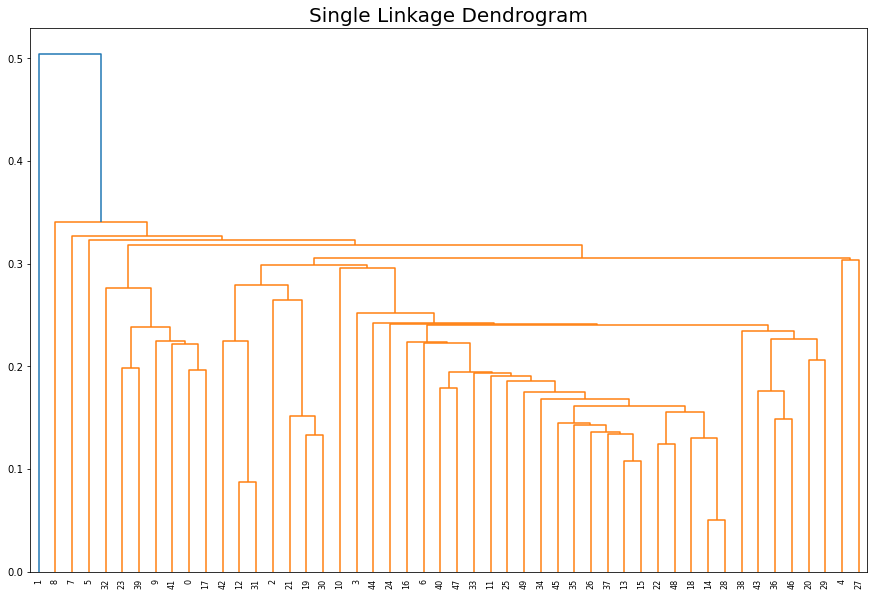

In [11]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.title('Single Linkage Dendrogram', size = 20)
plt.show()

In [12]:
hc_1= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [13]:
hc_1.fit_predict(df_norm)

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
y_hc_1 = hc_1.fit_predict(df_norm)

In [15]:
crime_data['h_clusterid'] = y_hc_1
crime_data

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [16]:
crime_data['h_clusterid'].value_counts()

0    47
3     1
1     1
2     1
Name: h_clusterid, dtype: int64

<AxesSubplot:>

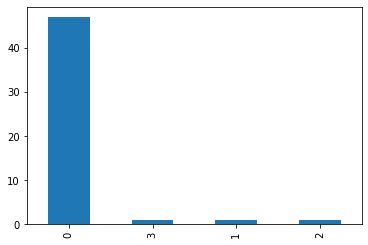

In [17]:
crime_data['h_clusterid'].value_counts().plot.bar()

In [18]:
silhouette_avg = silhouette_score(X, y_hc_1)
silhouette_avg

-0.16741191954744022

### Complete Linkage Method

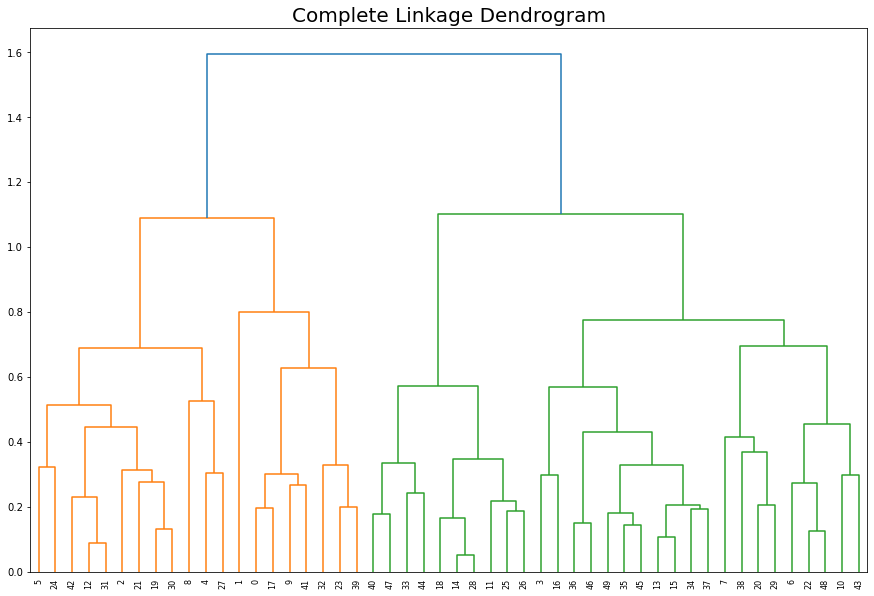

In [19]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title('Complete Linkage Dendrogram', size = 20)
plt.show()

In [20]:
hc_2= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [21]:
hc_2.fit_predict(df_norm)

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [22]:
y_hc_2 = hc_2.fit_predict(df_norm)

In [23]:
crime_data['h_clusterid'] = y_hc_2
crime_data

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [24]:
crime_data['h_clusterid'].value_counts()

1    20
3    12
2    10
0     8
Name: h_clusterid, dtype: int64

<AxesSubplot:>

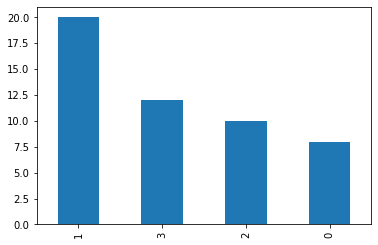

In [25]:
crime_data['h_clusterid'].value_counts().plot.bar()

In [26]:
silhouette_avg = silhouette_score(X, y_hc_2)
silhouette_avg

0.3060729442426307

## Average Linkage Method

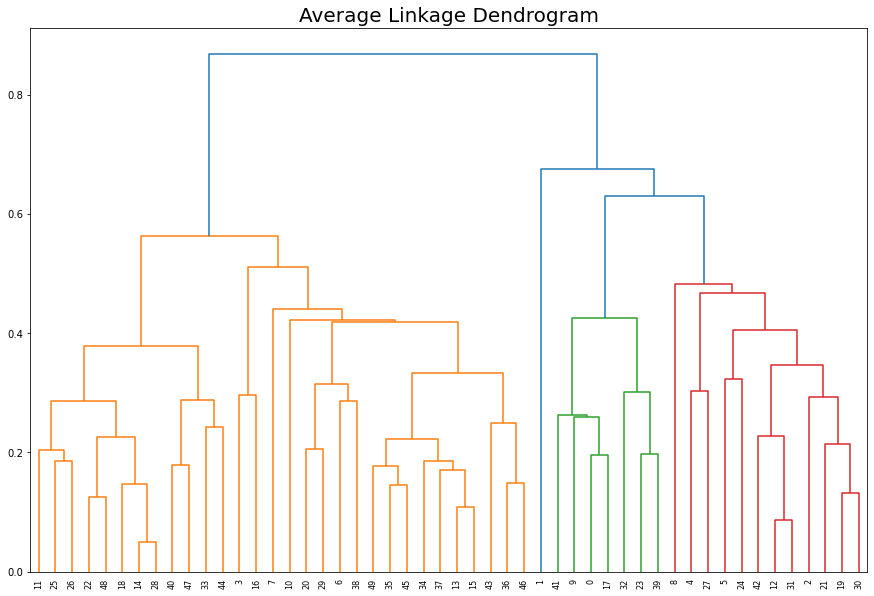

In [27]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('Average Linkage Dendrogram', size = 20)
plt.show()

In [28]:
hc_3= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [29]:
hc_3.fit_predict(df_norm)

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
y_hc_3 = hc_3.fit_predict(df_norm)

In [31]:
crime_data['h_clusterid'] = y_hc_3
crime_data

,States,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [32]:
crime_data['h_clusterid'].value_counts()

0    30
1    12
3     7
2     1
Name: h_clusterid, dtype: int64

<AxesSubplot:>

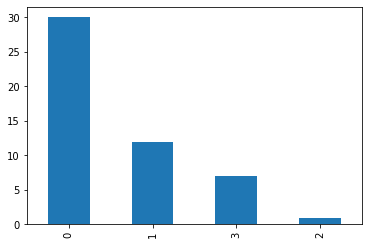

In [33]:
crime_data['h_clusterid'].value_counts().plot.bar()

In [34]:
silhouette_avg = silhouette_score(X, y_hc_3)
silhouette_avg

0.3699239114027717

## K-Means Clustering

In [35]:
crime_data1=pd.read_csv("crime_data.csv")

In [36]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [37]:
df_norm = norm_func(crime_data1.iloc[:,1:])

In [38]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


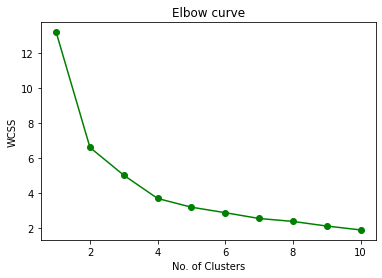

In [39]:
# Elbow curve
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bo-', color = 'g')
plt.title('Elbow curve')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above Elbow curve we can say that 4 clusters can be formed,because exact position of Elbow is at 4.

In [40]:
kmeans_cluster = KMeans(4, random_state = 42)
kmeans_cluster.fit(df_norm)

KMeans(n_clusters=4, random_state=42)

In [41]:
y_pred_k=kmeans_cluster.fit_predict(df_norm)

In [42]:
crime_data1['Cluster'] = y_pred_k
crime_data1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [43]:
crime_data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [44]:
crime_data1['Cluster'].value_counts()

3    17
0    13
1    12
2     8
Name: Cluster, dtype: int64

## DBSCAN Clustering

In [45]:
crime_data2=pd.read_csv("crime_data.csv")
crime_data2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
crime_data2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [47]:
array=crime_data2.values

In [48]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [49]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [50]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [51]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [52]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [53]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [54]:
pd.concat([crime_data2,c1],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [55]:
score = silhouette_score(crime_data2, dbscan.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.396


# Inference

##### Average Linkage is giving better result compared to other hierarchical clustering.From all the clustering methods KMeans Clustering also provides the better result with 4 clusters. First we have normalized the data because data has varying scales using StandardScaler method.The DBSCAN clusters find out noise from our data then we create epsilon,min points,an border point and the noisy is denoted by -1.   

# Q.2. Airlines

## Importing Data

In [56]:
Airlines = pd.read_csv("EastWestAirlines.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## EDA

In [57]:
Airlines.shape

(3999, 12)

In [58]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [59]:
Airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [60]:
Airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [61]:
Airlines_1=Airlines.rename({'Award?':'Award'},axis=1)

In [62]:
Airlines_1.drop(['ID#'],axis=1,inplace=True)

In [63]:
Airlines_1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


## Hierarchical Clustering

In [64]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [65]:
df_norm = norm_func(Airlines_1.iloc[:,1:])

In [66]:
X=df_norm.iloc[:,:]

### Single Linkage Method

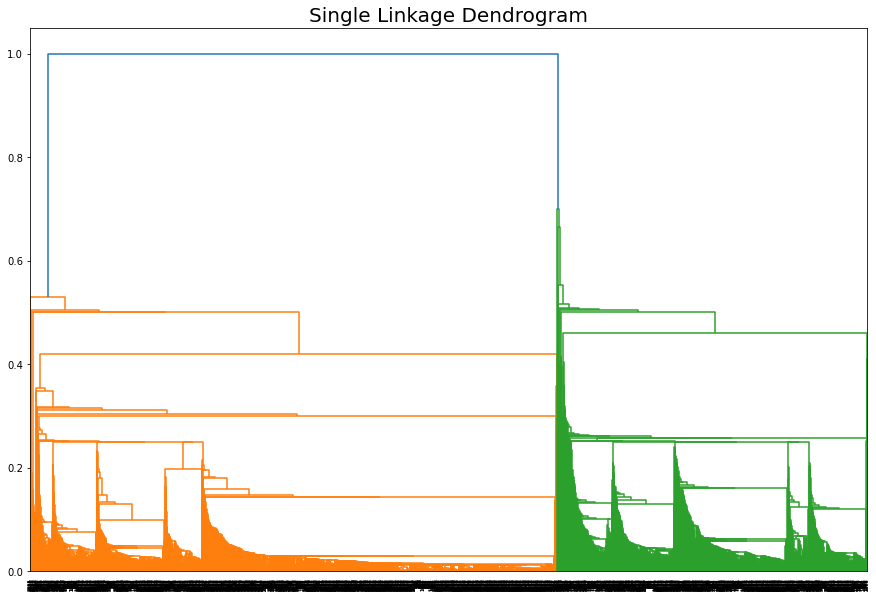

In [67]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))
plt.title('Single Linkage Dendrogram', size = 20)
plt.show()

In [68]:
hc_1= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [69]:
hc_1.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [70]:
y_hc_1 = hc_1.fit_predict(df_norm)

In [71]:
Airlines_1['h_clusterid'] = y_hc_1
Airlines_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [72]:
Airlines_1['h_clusterid'].value_counts()

0    2518
1    1478
4       1
3       1
2       1
Name: h_clusterid, dtype: int64

<AxesSubplot:>

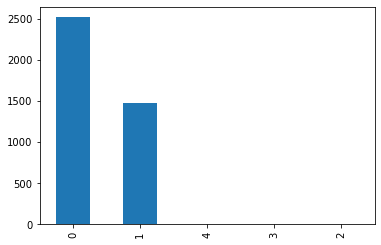

In [73]:
Airlines_1['h_clusterid'].value_counts().plot.bar()

In [74]:
silhouette_avg = silhouette_score(X, y_hc_1)
silhouette_avg

0.4836037017646729

### Complete Linkage Method

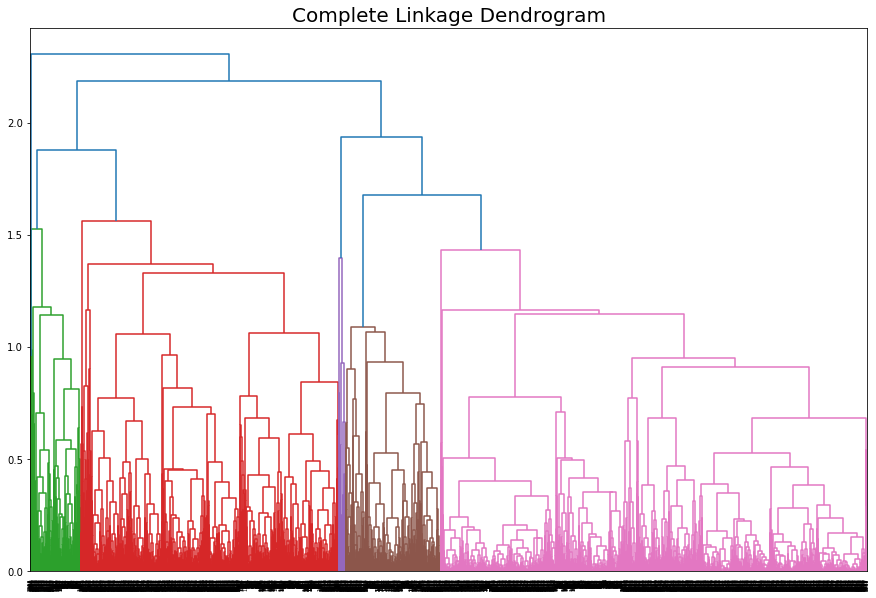

In [75]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))
plt.title('Complete Linkage Dendrogram', size = 20)
plt.show()

In [76]:
hc_2= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [77]:
hc_2.fit_predict(df_norm)

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [78]:
y_hc_2 = hc_2.fit_predict(df_norm)

In [79]:
Airlines_1['h_clusterid'] = y_hc_2
Airlines_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [80]:
Airlines_1['h_clusterid'].value_counts()

0    2493
2    1232
1     239
4      31
3       4
Name: h_clusterid, dtype: int64

<AxesSubplot:>

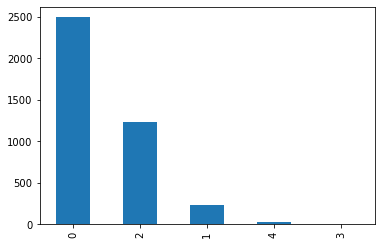

In [81]:
Airlines_1['h_clusterid'].value_counts().plot.bar()

In [82]:
silhouette_avg = silhouette_score(X, y_hc_2)
silhouette_avg

0.41614095050411243

### Average Linkage Method

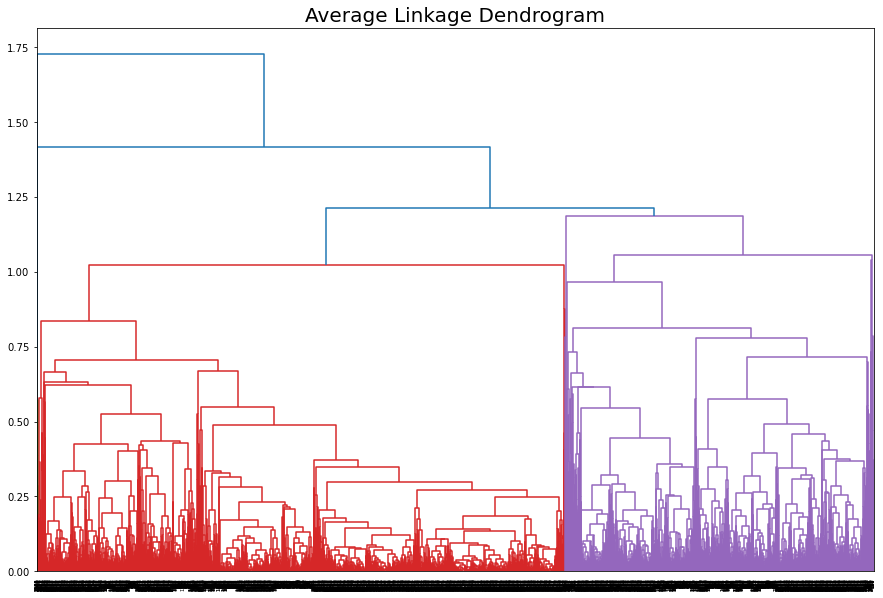

In [83]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))
plt.title('Average Linkage Dendrogram', size = 20)
plt.show()

In [84]:
hc_3= AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [85]:
hc_3.fit_predict(df_norm)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [86]:
y_hc_3 = hc_3.fit_predict(df_norm)

In [87]:
Airlines_1['h_clusterid'] = y_hc_3
Airlines_1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [88]:
Airlines_1['h_clusterid'].value_counts()

1    2518
0    1466
4       7
2       6
3       2
Name: h_clusterid, dtype: int64

<AxesSubplot:>

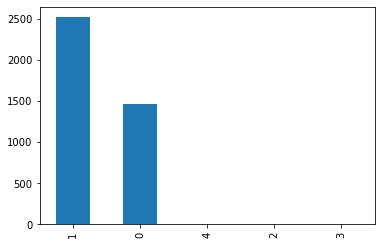

In [89]:
Airlines_1['h_clusterid'].value_counts().plot.bar()

In [90]:
silhouette_avg = silhouette_score(X, y_hc_3)
silhouette_avg

0.512539459425622

## K-Means Clustering

In [91]:
Airlines_2= pd.read_csv("EastWestAirlines.csv")
Airlines_2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [92]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [93]:
df_norm = norm_func(Airlines_2.iloc[:,1:])

In [94]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


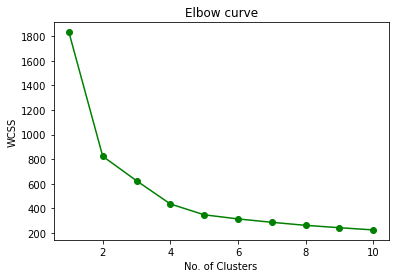

In [95]:
# Elbow curve
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=12)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,'bo-', color = 'g')
plt.title('Elbow curve')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans_cluster = KMeans(5, random_state = 42)
kmeans_cluster.fit(df_norm)

KMeans(n_clusters=5, random_state=42)

In [97]:
y_pred_k=kmeans_cluster.fit_predict(df_norm)

In [98]:
Airlines_2['Cluster'] = y_pred_k
Airlines_2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [99]:
Airlines_2['Cluster'].value_counts()

4    1032
1     868
0     808
2     673
3     618
Name: Cluster, dtype: int64

## DBSCAN Clustering

In [100]:
Airlines_3=pd.read_csv("EastWestAirlines.csv")
Airlines_3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [101]:
array=Airlines_3.values

In [102]:
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [103]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [104]:
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [105]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [106]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [108]:
pd.concat([Airlines_3,c1],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [109]:
score = silhouette_score(Airlines_3, dbscan.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.430


## Inference

##### Average Linkage is giving better result compared to other hierarchical clustering.From all the clustering methods KMeans Clustering also provides the better result with 5 clusters. First we have normalized the data because data has varying scales using StandardScaler method.The DBSCAN clusters find out noise from our data then we create epsilon,min points,an border point and the noisy is denoted by -1.